In [71]:
#imports
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
from matplotlib.pyplot import figure

pd.options.display.max_colwidth = 100

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [20]:
# Loading the forecasts data set
data = pd.read_csv('data/HUMAN_public_social_media.csv')

In [98]:
print(data.head())

   Unnamed: 0              locations          _timestamp  num_persons
0           0  ['ankara', 'baghdad'] 2019-12-11 16:31:09        275.0
1           1                     [] 2019-12-13 20:49:57        313.0
2           2             ['greece'] 2019-12-23 21:31:23       1300.0
3           3    ['libya', 'italia'] 2019-12-26 19:33:11       1500.0
4           4   ['greece', 'turkey'] 2019-12-27 12:50:19          NaN
2654


In [99]:
print(len(data))

2654


In [79]:
#Select neccessary Columns
data_selected = data[['Unnamed: 0', 'locations','_timestamp','num_persons']].copy()
data_selected.head()

,Unnamed: 0,locations,_timestamp,num_persons
0,0,"['ankara', 'baghdad']",2019-12-11 16:31:09,275.0
1,1,[],2019-12-13 20:49:57,313.0
2,2,['greece'],2019-12-23 21:31:23,1300.0
3,3,"['libya', 'italia']",2019-12-26 19:33:11,1500.0
4,4,"['greece', 'turkey']",2019-12-27 12:50:19,NaN


In [41]:
#Types
dataTypeSeries = data_selected.dtypes
print(dataTypeSeries)

Unnamed: 0              int64
locations              object
_timestamp     datetime64[ns]
num_persons           float64
dtype: object


In [84]:
#exclude outliers
data_selected['num_persons'].max()
data_selected = data_selected[data_selected['num_persons'] != 4013000]

In [85]:
data_selected['num_persons'].max()

800000.0

In [42]:
locactionBased = data.groupby('locations').sum()
locactionBased.head()

,Unnamed: 0,num_persons
locations,,
['a414'],1126,0.0
"['aegean islands', 'island']",2613,1000.0
"['aegean sea', 'egypt']",12,0.0
['aegean sea'],1968,1852.0
"['aegean', 'turkey', 'greece', 'pakistan']",1214,0.0


4013000.0

In [117]:
data_selected['_timestamp'] = pd.to_datetime(data_selected['_timestamp'])
data_selected.head()

,Unnamed: 0,locations,_timestamp,num_persons
0,0,"['ankara', 'baghdad']",2019-12-11 16:31:09,275.0
1,1,[],2019-12-13 20:49:57,313.0
2,2,['greece'],2019-12-23 21:31:23,1300.0
3,3,"['libya', 'italia']",2019-12-26 19:33:11,1500.0
4,4,"['greece', 'turkey']",2019-12-27 12:50:19,NaN


In [115]:
data_dategrouped = data_selected.set_index('_timestamp').groupby(pd.Grouper(freq='D')).count().copy()
data_dategrouped.sort_values(by=['Unnamed: 0'])

,Unnamed: 0,locations,num_persons
_timestamp,,,
2019-12-21,0,0,0
2019-07-14,0,0,0
2019-12-19,0,0,0
2019-12-20,0,0,0
2019-07-18,0,0,0
...,...,...,...
2019-11-09,98,98,5
2019-09-27,114,114,17
2019-10-11,119,119,24


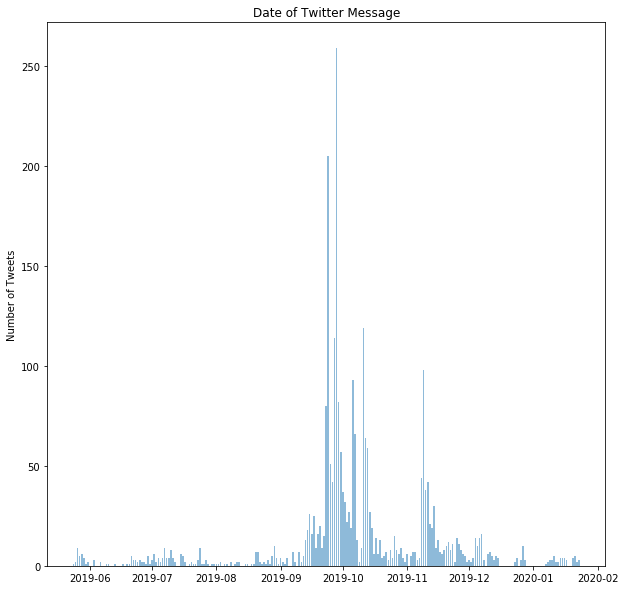

In [116]:
#Show number of tweets per day
fig = pyplot.figure(figsize=(10,10))

pyplot.bar(data_dategrouped.index.values,data_dategrouped['Unnamed: 0'], align='center', alpha=0.5)
pyplot.ylabel('Number of Tweets')
pyplot.title('Date of Twitter Message')

pyplot.show()

In [111]:
data_dategrouped_mean = data_selected.set_index('_timestamp').groupby(pd.Grouper(freq='D')).mean().copy()
data_dategrouped_mean.head()

,Unnamed: 0,num_persons
_timestamp,,
2019-05-24,575.000000,NaN
2019-05-25,532.500000,NaN
2019-05-26,952.666667,3187.5
2019-05-27,755.400000,3000.0
2019-05-28,879.333333,2078.4


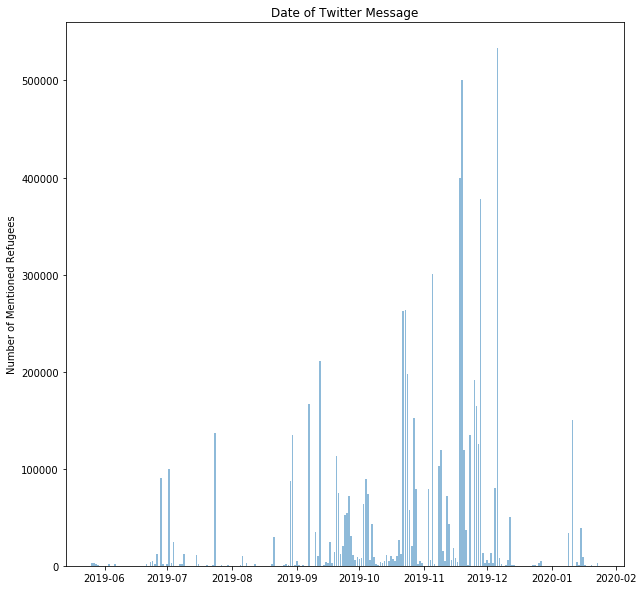

In [112]:
#Show mean number of refugees mentoined in tweets
fig = pyplot.figure(figsize=(10,10))

pyplot.bar(data_dategrouped_mean.index.values,data_dategrouped['num_persons'], align='center', alpha=0.5)
pyplot.ylabel('Number of Mentioned Refugees')
pyplot.title('Date of Twitter Message')

pyplot.show()